In [2]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import joblib

In [4]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [5]:
Train_data=pd.read_csv(r"C:\Users\Admin\Documents\new_train_sample.csv")

In [6]:
Train_data

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [7]:
list(Train_data.columns)

['Unnamed: 0',
 'Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [8]:
#pandas to display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)

In [9]:
Train_data.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630


In [10]:
Train_data.shape

(4758418, 46)

In [11]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [12]:
#Data Preprocessing
# check for percentage of  missing values
(Train_data.isnull().sum()/(len(Train_data)))*100

Unnamed: 0             0.000000
Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.437913
IncidentGrade          0.541672
ActionGrouped         99.407093
ActionGranular        99.407093
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.987542
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApp

In [18]:
# removing 50% above null value
threshold= len(Train_data)* 0.5   
Train_data=Train_data.dropna(thresh=threshold,axis=1)

In [19]:
Train_data.shape

(4758418, 36)

In [20]:
#check for duplicates
Train_data.duplicated().sum()

0

In [21]:
Train_data.drop_duplicates(inplace=True)

In [22]:
Train_data.isnull().sum()

Unnamed: 0                0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         25775
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                

In [23]:
#since incident grade is our target we cannot fill null values with unknown values as it mislead training 
Train_data["IncidentGrade"].fillna(Train_data["IncidentGrade"].mode()[0],inplace=True) # fill mode values for IncidentGrade

In [24]:
Train_data.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [25]:
#standardize  as proper datetime values
Train_data['Timestamp']=pd.to_datetime(Train_data['Timestamp']) 

In [26]:
Train_data['Timestamp'].head()

0   2024-06-06 05:56:47+00:00
1   2024-06-03 10:45:09+00:00
2   2024-06-13 03:36:40+00:00
3   2024-06-08 16:54:57+00:00
4   2024-06-09 02:48:01+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [27]:
#changing to pandas datetime format
Train_data["Day"]=Train_data["Timestamp"].dt.day
Train_data["Month"]=Train_data["Timestamp"].dt.month
Train_data["Year"]=Train_data["Timestamp"].dt.year
Train_data["Hour"]=Train_data["Timestamp"].dt.hour
Train_data["Time"]=Train_data["Timestamp"].dt.time
     

In [28]:
Train_data.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
print(Train_data.head())

   Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1709396985476     26       18583   687462          31   
1     8470561   927712939180     33        5065     3990          38   
2     5897583  1090921697002    201      150787   807590         419   
3     3288552  1434519079555    204      108287    28575          44   
4     4060961  1005022347708     54      528202  1458226         102   

   AlertTitle            Category   IncidentGrade EntityType EvidenceRole  \
0         813             Malware  BenignPositive       File      Related   
1          25              Impact  BenignPositive    Machine     Impacted   
2         444           Execution  BenignPositive    Machine     Impacted   
3        1233  SuspiciousActivity    TruePositive       File      Related   
4       58829        Exfiltration  BenignPositive       File     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799    1296     360606  160396

In [29]:
#calculate the frequency of each unique value in the 'IncidentGrade' 
Train_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    2080549
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64

In [30]:
Train_data.Category.unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing', 'WebExploit', 'Weaponization'], dtype=object)

In [31]:
Train_data.isnull().sum()

Unnamed: 0            0
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Day                   0
Month                 0
Year                  0
Hour                  0
Time                  0
dtype: int64

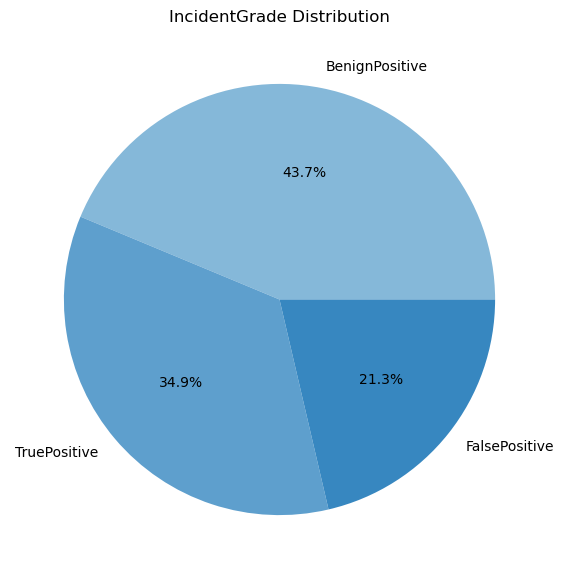

In [32]:
#EDA (Explotary data analysis) and Data visualization¶
# Distribution of target variable
Train_data['IncidentGrade'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Blues_d", n_colors=5), figsize=(7, 7))
plt.title("IncidentGrade Distribution")
plt.ylabel('')
plt.show()


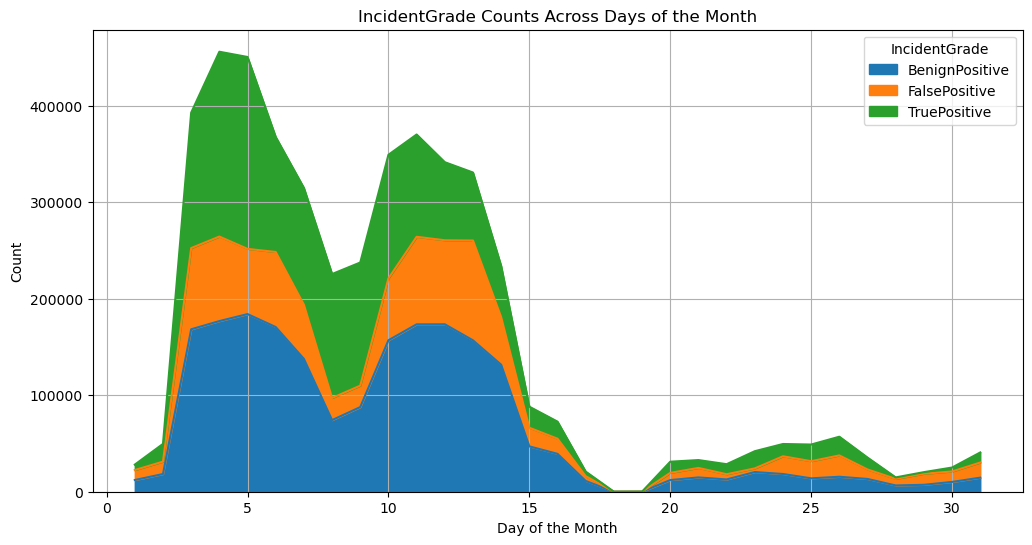

In [33]:
#aggregate the data, then creating a stacked bar plot to visualize the distribution of different IncidentGrade values across days of the month
day_incident_grade = Train_data.groupby(['Day', 'IncidentGrade']).size().unstack()
day_incident_grade.plot(kind='area', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()


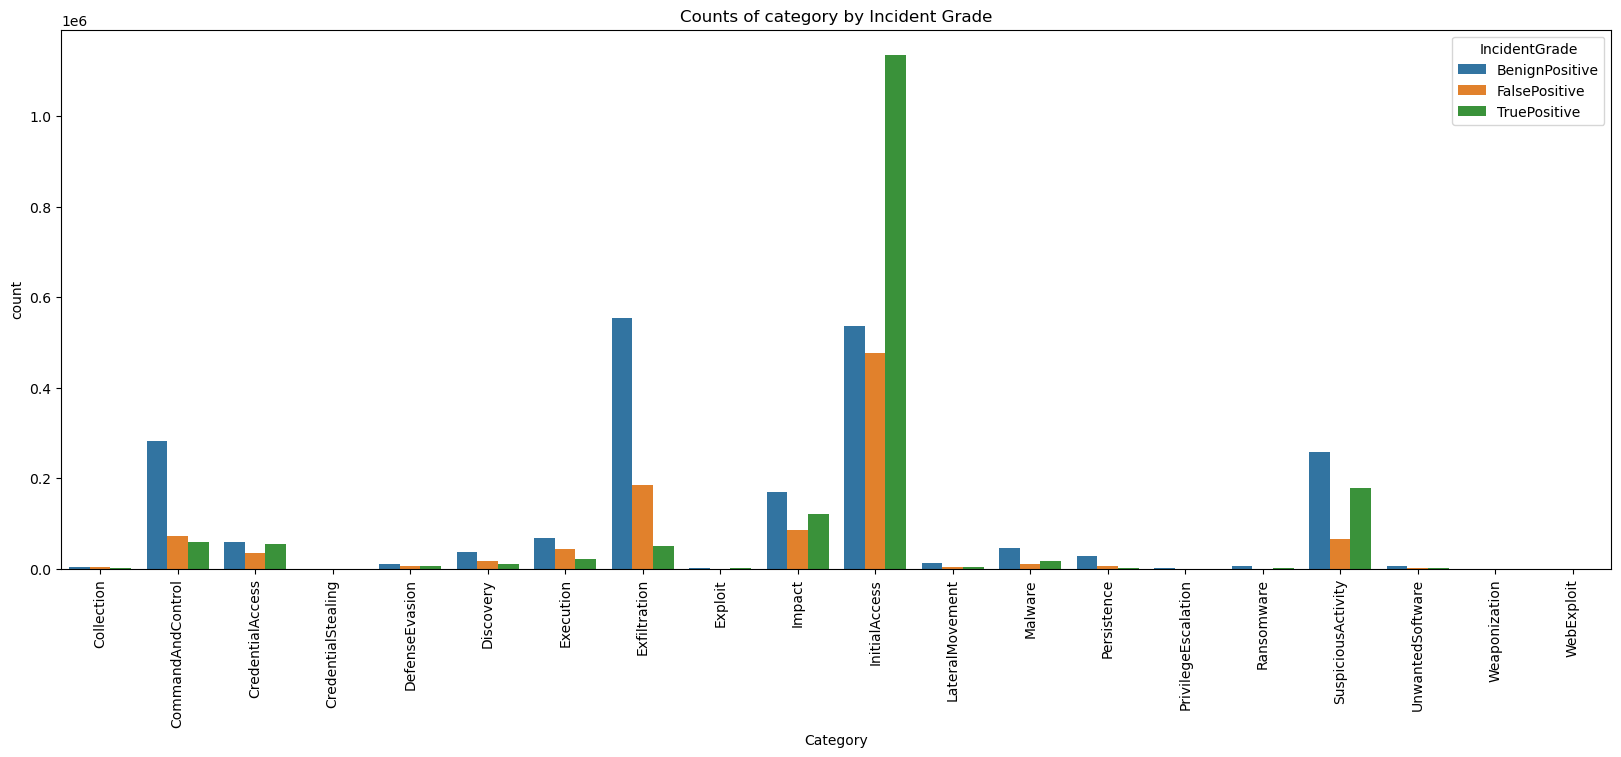

In [34]:
# Aggregate data
grouped_data=Train_data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

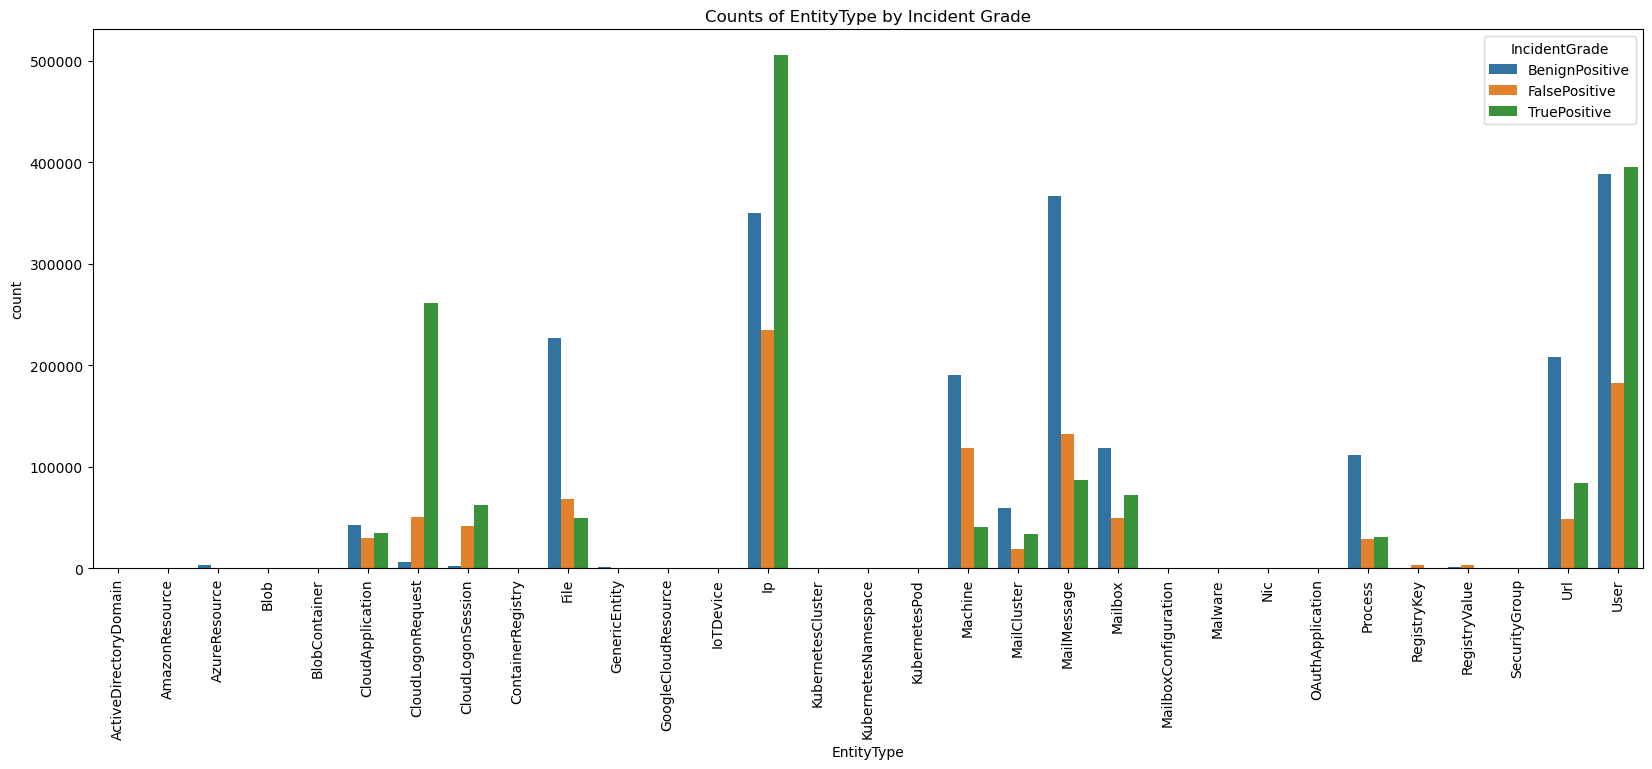

In [37]:
# Aggregate data
grouped_data=Train_data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()

In [39]:
# dropping 70% above correlated columns
Train_data.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True,errors='ignore')

In [40]:
Train_data['State'].fillna(Train_data['State'].mode()[0], inplace=True)
Train_data['CountryCode'].fillna(Train_data['CountryCode'].mode()[0], inplace=True)
Train_data['City'].fillna(Train_data['City'].mode()[0], inplace=True)
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 33 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Id                 int64 
 1   OrgId              int64 
 2   IncidentId         int64 
 3   AlertId            int64 
 4   DetectorId         int64 
 5   AlertTitle         int64 
 6   Category           object
 7   IncidentGrade      object
 8   EntityType         object
 9   EvidenceRole       object
 10  Sha256             int64 
 11  IpAddress          int64 
 12  Url                int64 
 13  AccountSid         int64 
 14  AccountUpn         int64 
 15  AccountObjectId    int64 
 16  AccountName        int64 
 17  RegistryKey        int64 
 18  RegistryValueName  int64 
 19  RegistryValueData  int64 
 20  ApplicationId      int64 
 21  ApplicationName    int64 
 22  FileName           int64 
 23  FolderPath         int64 
 24  OSFamily           int64 
 25  OSVersion          int64 
 26  CountryCode   

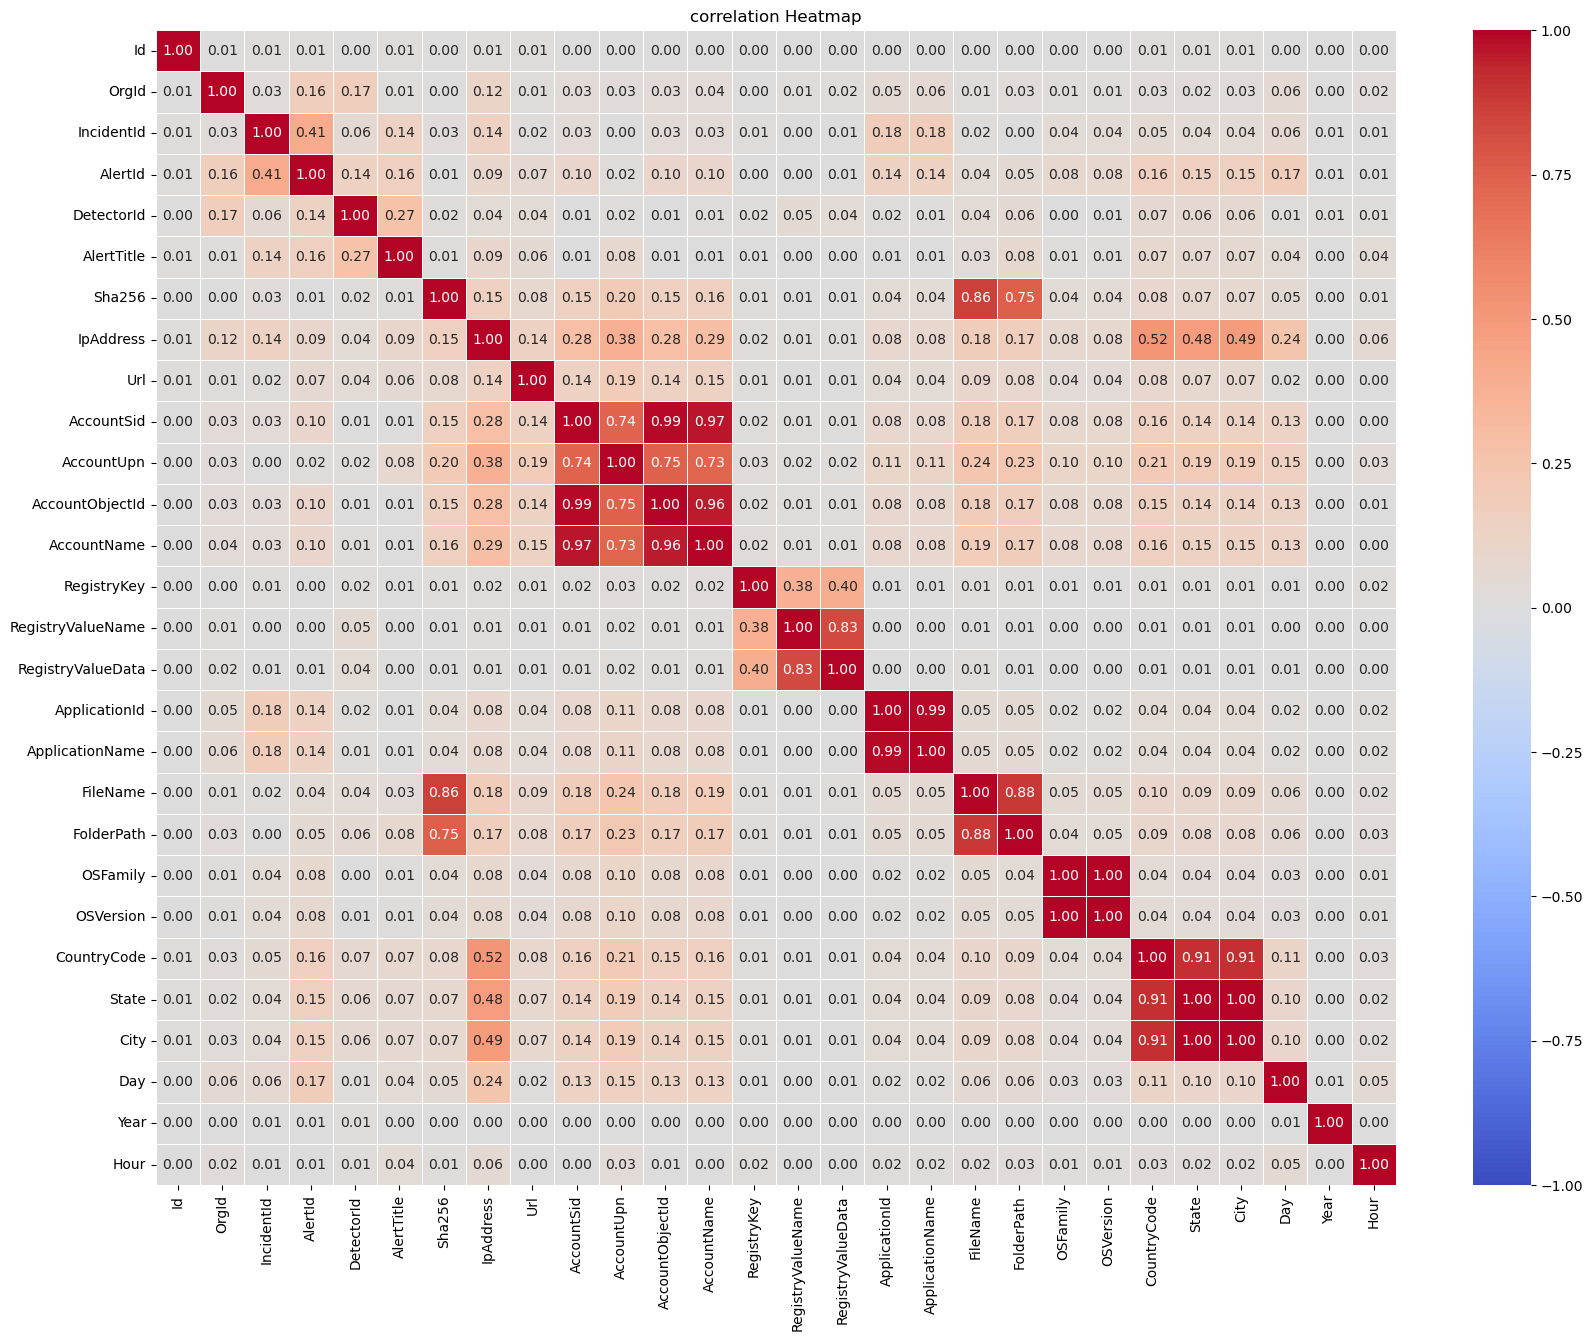

In [41]:
#Feature selection and correlation
# selecting numerical col
numeric_df=Train_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [43]:
# dropping 70% above correlated columns
Train_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"] , axis=1,inplace = True, errors='ignore')
     


In [44]:
# dropping 70% above correlated columns
Train_data.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True, errors='ignore')

In [45]:
# dropping 70% above correlated columns
Train_data.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True, errors='ignore')

In [46]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 526.4+ MB


In [47]:
#Encoding
Train_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [48]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']
#label encoding 
encoders = {}
for i in Categorical_coltr:
    le = LabelEncoder()
    Train_data[i]=le.fit_transform(Train_data[i])
    encoders[i]=le
Train_data

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,9,1,360606,160396,2251,10630,6,2024,5,21407
1,33,5065,3990,25,9,0,17,0,360606,160396,2251,10630,3,2024,10,38709
2,201,150787,807590,444,6,0,17,0,360606,160396,2251,10630,13,2024,3,13000
3,204,108287,28575,1233,16,2,9,1,360606,160396,2251,10630,8,2024,16,60897
4,54,528202,1458226,58829,7,0,9,0,360606,160396,2251,10630,9,2024,2,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,142,93987,15739,7836,7,1,19,0,360606,160396,2251,10630,10,2024,10,37517
4758414,36,1001,257479,2,1,1,30,0,360606,160396,2251,10630,11,2024,19,70252
4758415,851,31194,1518250,1,10,0,19,1,360606,160396,2251,10630,9,2024,4,16061
4758416,12,2419,1203,1334,9,0,13,1,546,160396,2251,10630,21,2024,23,82871


In [49]:
Train_data.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [50]:
Train_data.to_csv("Traindata.csv",index=False)

In [64]:
# testing data
Test_data=pd.read_csv(r"C:/Users/Admin/Desktop/GUIDE_Test.csv")


In [65]:
Test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,NaN,NaN,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,NaN,NaN,Mailbox,Impacted,98799,138268,360606,160396,53146,59351,53421,25428,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [67]:
list(Test_data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [69]:
pd.set_option('display.max_columns', None)
Test_data.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private


In [70]:
Test_data.shape

(4147992, 46)

In [71]:
Test_data.info

<bound method DataFrame.info of                     Id  OrgId  IncidentId  AlertId                 Timestamp  \
0        1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1        1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2        1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3          60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4         515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   
...                ...    ...         ...      ...                       ...   
4147987   541165881145    262        3017   227156  2024-06-04T03:53:15.000Z   
4147988   438086666953   1323       31001   304819  2024-06-04T19:32:19.000Z   
4147989  1297080124487     47        3653     7243  2024-06-15T00:50:22.000Z   
4147990   627065226886     70        4243    19142  2024-06-11T16:18:12.000Z   
4147991   326417516547    227        8384    33529  2024-06-04T18:11:09.000Z   

       

In [72]:
#check for missing values
Test_data.isnull().sum()/len(Test_data)*100

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       55.619779
IncidentGrade          0.000000
ActionGrouped         99.953881
ActionGranular        99.953881
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.994526
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

In [73]:
#handle null values
threshold= len(Test_data)* 0.5   # removing 50% above null value
Test_data=Test_data.dropna(thresh=threshold,axis=1)

In [74]:
Test_data.shape

(4147992, 36)

In [75]:
Test_data.duplicated().sum()

225297

In [76]:
Test_data.drop_duplicates(inplace=True)
Test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,2024-06-03T20:24:41.000Z,135,7322,Malware,BenignPositive,Machine,Impacted,4,138268,360606,160396,441377,673934,425863,453297,4,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public


In [77]:
#mode imputation because of catagorial columns

Test_data["IncidentGrade"].fillna(Test_data["IncidentGrade"].mode()[0],inplace=True)

In [78]:
Test_data['Timestamp']=pd.to_datetime(Test_data['Timestamp']) # data clean Timestamp
Test_data['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [79]:
Test_data["Day"]=Test_data["Timestamp"].dt.day
Test_data["Month"]=Test_data["Timestamp"].dt.month
Test_data["Year"]=Test_data["Timestamp"].dt.year
Test_data["Hour"]=Test_data["Timestamp"].dt.hour
Test_data["Time"]=Test_data["Timestamp"].dt.time

In [80]:
[features for features in Test_data.columns if Test_data[features].isnull().sum()>0]

[]

In [82]:
Test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,2024-06-04 22:56:27+00:00,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,2024-06-12 12:07:31+00:00,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,2024-06-06 17:42:05+00:00,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,2024-06-03 20:24:41+00:00,135,7322,Malware,BenignPositive,Machine,Impacted,4,138268,360606,160396,441377,673934,425863,453297,4,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,20,20:24:41
4147987,541165881145,262,3017,227156,2024-06-04 03:53:15+00:00,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,4,6,2024,3,03:53:15
4147988,438086666953,1323,31001,304819,2024-06-04 19:32:19+00:00,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,19,19:32:19
4147989,1297080124487,47,3653,7243,2024-06-15 00:50:22+00:00,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,15,6,2024,0,00:50:22


In [83]:
Test_data.drop("Timestamp",axis=1,inplace=True)  # doprring timestamp column
print(Test_data.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category   IncidentGrade         EntityType EvidenceRole  \
0    LateralMovement  BenignPositive               User     Impacted   
1  CommandAndControl  BenignPositive            Machine     Impacted   
2    LateralMovement  BenignPositive            Process      Related   
3      InitialAccess   FalsePositive  CloudLogonSession      Related   
4          Discovery  BenignPositive               User     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799  138268     360606  160396        2610        3699   
1 

In [84]:
pd.set_option("display.max_columns", None)
Test_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05


In [85]:
Test_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

In [86]:
Test_data.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

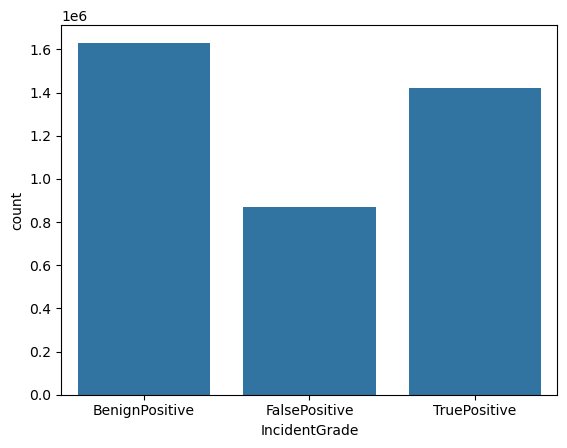

In [87]:
#visualization of data
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=Test_data)
plt.show()

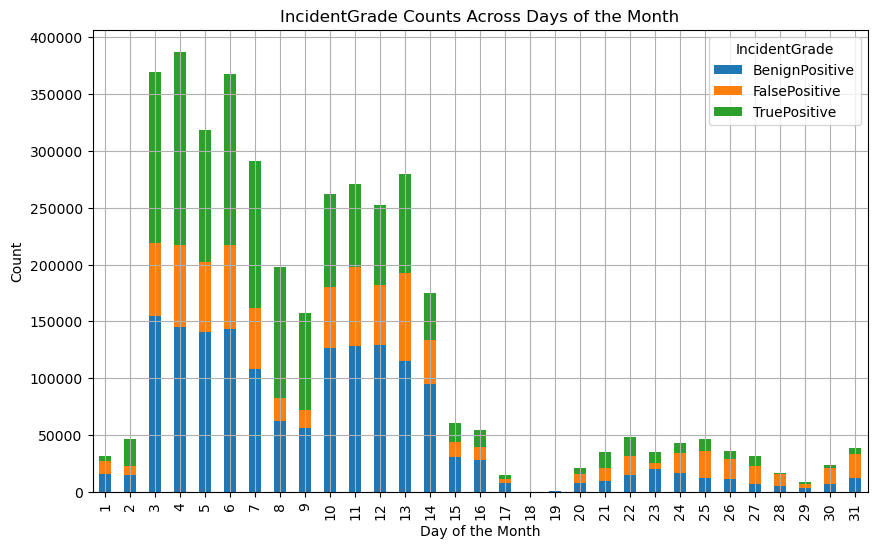

In [88]:
# Aggregate data
day_incident_grade = Test_data.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

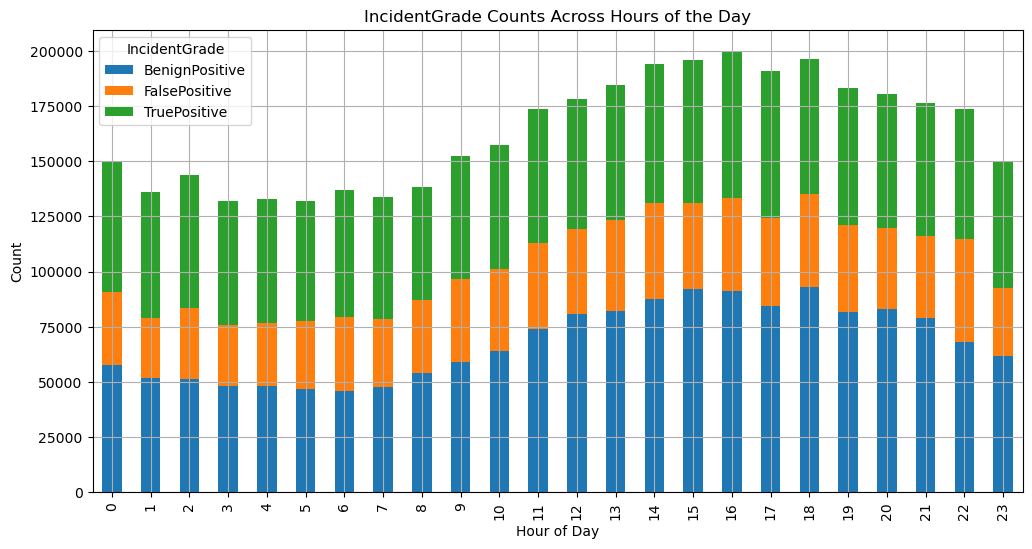

In [89]:
# Aggregate data

hour_incident =Test_data.groupby(['Hour', 'IncidentGrade']).size().unstack()

hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title="IncidentGrade")
plt.grid(True)
plt.show()

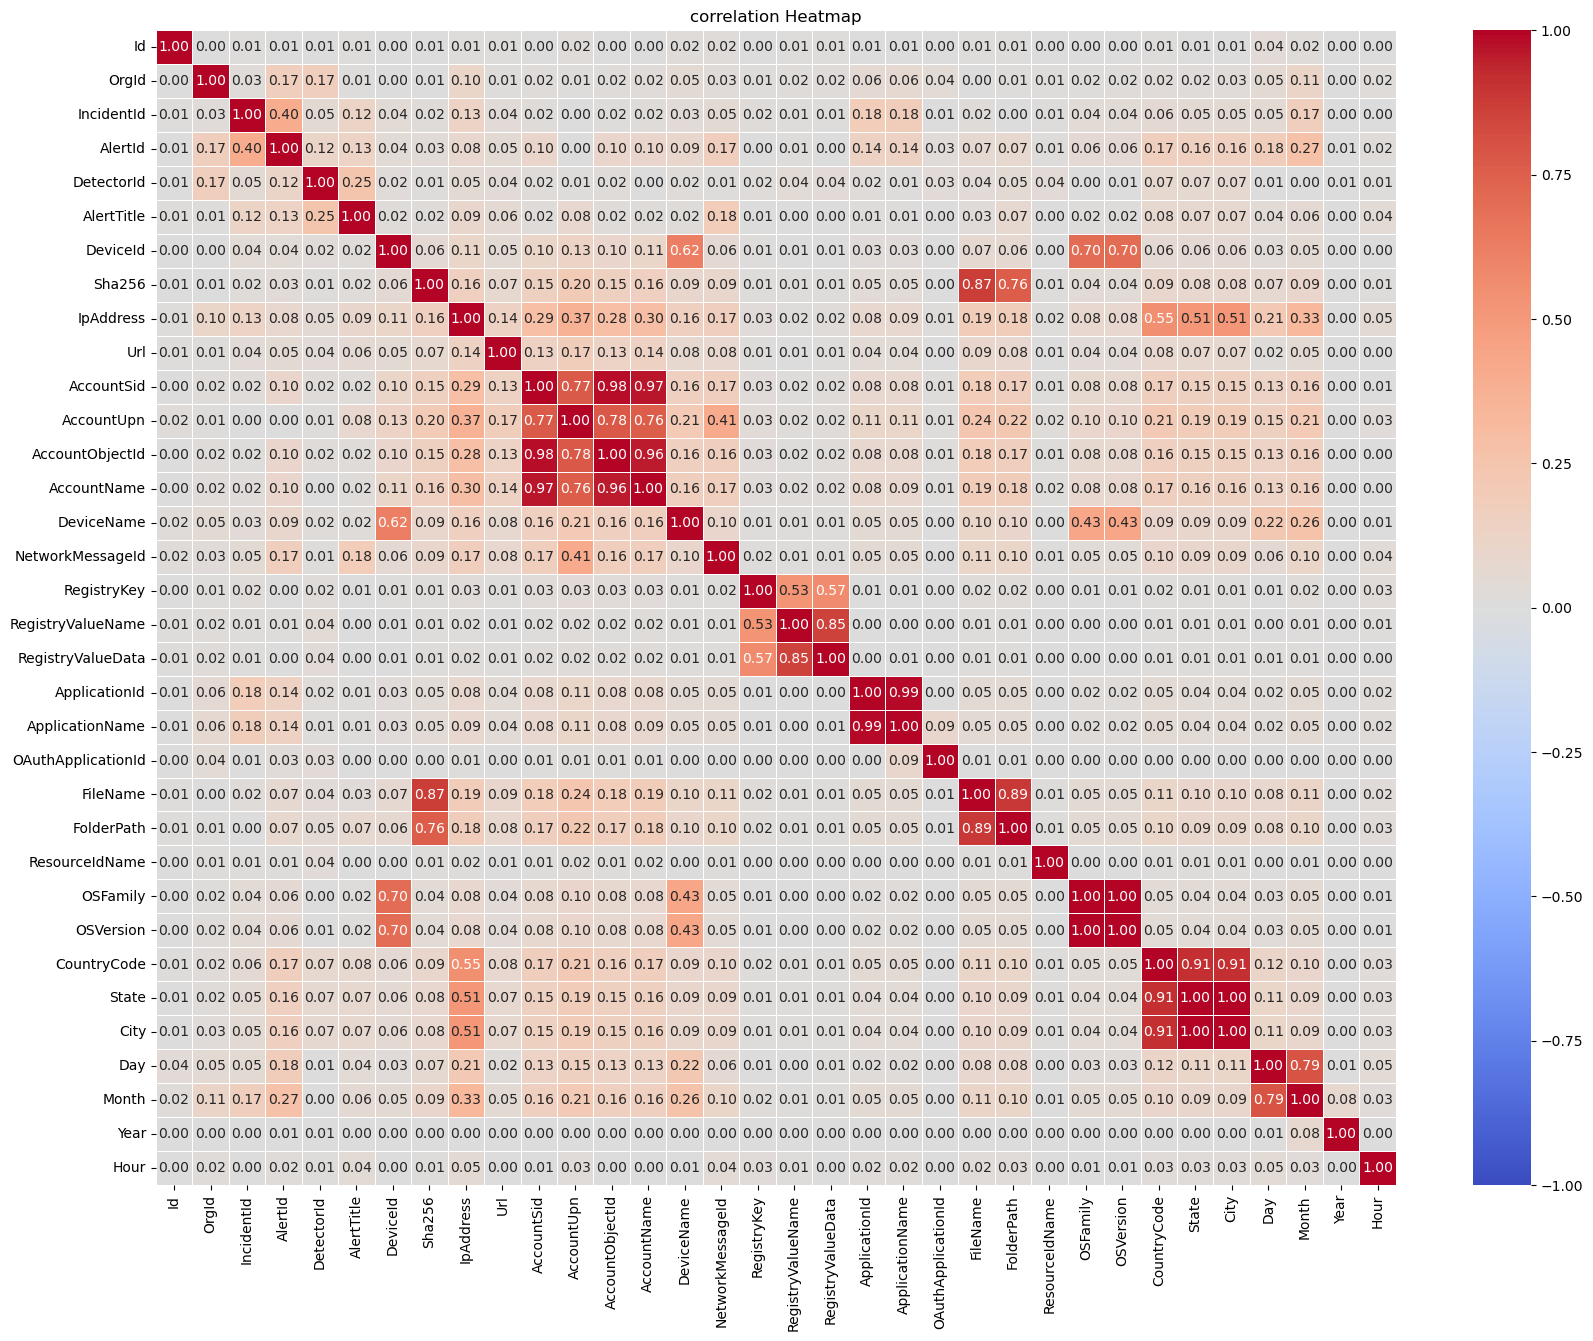

In [90]:
# selecting numerical col
numeric_df=Test_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [91]:
# dropping 70% above correlated columns
Test_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True,errors='ignore')

In [93]:
Test_data.shape

(3922695, 29)

In [94]:
#encoding
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 29 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  IpAddress           int64 
 12  Url                 int64 
 13  AccountName         int64 
 14  DeviceName          int64 
 15  NetworkMessageId    int64 
 16  RegistryKey         int64 
 17  RegistryValueData   int64 
 18  ApplicationId       int64 
 19  OAuthApplicationId  int64 
 20  FileName            int64 
 21  ResourceIdName      int64 
 22  City                int64 
 23  Usage               object
 24  Day                 int32 
 25  Month               int

In [95]:
Test_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [96]:
Categorical_colts=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time']
encoders = {}
for i in Categorical_colts:
    le = LabelEncoder()
    Test_data[i]=le.fit_transform(Test_data[i])
    encoders[i]=le

In [97]:
Test_data

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,63665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,135,7322,12,0,15,0,4,360606,160396,453297,4,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,20,73420
4147987,541165881145,262,3017,227156,139,120,10,0,28,0,98799,360606,160396,14567,153085,529644,1631,860,2251,881,289573,3586,10630,1,4,6,2024,3,13978
4147988,438086666953,1323,31001,304819,219,196,10,0,28,0,98799,360606,160396,107151,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,19,70279
4147989,1297080124487,47,3653,7243,57,29,1,1,12,1,98799,1084,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,15,6,2024,0,3020


In [98]:
Test_data.select_dtypes(include=["int32", "int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'City', 'Usage',
       'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [99]:
Test_data.to_csv(r"Testdata.csv", index=False)

In [100]:
#loading the saved files
Train_data=pd.read_csv(r"Traindata.csv")


In [101]:
Test_data=pd.read_csv(r"Testdata.csv")

In [102]:
print(Train_data.shape)
print(Test_data.shape)

(4758418, 16)
(3922695, 29)


In [105]:
#Align both data sets using join function
Train_data, Test_data = Train_data.align(Test_data, join='left', axis=1)
Test_data.fillna(0, inplace=True)

In [106]:
Test_data = Test_data.reset_index(drop=True)

In [107]:
# Saveing the data using Joblib
joblib.dump(Test_data, 'encoded_test_data1.joblib')

['encoded_test_data1.joblib']

In [51]:
 #Saveing the data using Joblib
joblib.dump(Train_data, 'encoded_train_data1.joblib')

['encoded_train_data1.joblib']

In [108]:
# Loading the data using Joblib
Test_data = joblib.load('encoded_test_data1.joblib')

In [109]:
Test_data.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,657,11767,87199,563,11,0,28,0,360606,160396,2251,10630,4,2024,22,82520
1,3,91158,632273,2,1,0,15,0,360606,160396,2251,10630,3,2024,12,46649
2,145,32247,131719,10807,11,0,23,1,360606,160396,2251,10630,8,2024,3,12037
3,222,15294,917686,0,10,1,7,1,360606,160396,2251,10630,12,2024,12,43594
4,363,7615,5944,18,5,0,28,0,360606,160396,2251,10630,6,2024,17,63665


In [110]:
print(Test_data.memory_usage(deep=True).sum() / (1024 ** 2), "MB")

478.84473037719727 MB
